## Demo for modelling dual-channel PSF from SMLM data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
main_data_dir = io.param.load('datapath.yaml').main_data_dir

#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='2ch',sysfile='M2')

#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/2ch_smlm_nup96_WGA/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'Pos0.' # keyword of the file name or the full file name without extension
L.param.gain = 0.1
L.param.ccd_offset = 400
L.param.option.insitu.stage_pos = 0.5 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.peak_height = 0.2 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.roi.roi_size = [21,21]
L.param.batch_size = 1000 # lower this number if out of memory
L.param.option.model.const_pupilmag = False
L.param.option.imaging.emission_wavelength = 0.68 # micron

#### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:/EMBL files/data for PSF learning/example data for uiPSF//2ch_smlm_nup96_WGA\01_191009_u2os_course_96_WGA_3D_ritu_1_MMStack_Pos0.ome.tif
(2, 2000, 234, 256)
rois shape channel 0: (16094, 21, 21)
rois shape channel 1: (8603, 21, 21)
rois shape channel 0: (5122, 21, 21)
rois shape channel 1: (5122, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.50s/it total time: 1.49s
5/6: localization: 4/4 [00:00s] 13.48it/s total time: 1.78s
3/6: learning: 52/100 [00:27s]  1.90it/s, current loss: 1.31601, total time: 27.31s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.48s/it total time: 28.78s
5/6: localization: 4/4 [00:00s] 15.62it/s total time: 29.04s
3/6: learning: 52/100 [00:27s]  1.92it/s, current loss: 0.82154, total time: 54.42s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.49s/it total time: 2.96s
5/6: localization: 4/4 [01:20s] 20.13s/it total time: 83.46s
c:\Users\Sheng\Documents\git\python\uiPSF\demo\..\psflearning\learning\psfs\PSFMultiChannel_smlm_file.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['z'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 208/250 [01:26s]  2.40it/s, current loss: 1.99496, total time: 141.10s


outlier percentage: 0.24635456638526476
rois shape channel 0: (982, 21, 21)
rois shape channel 1: (982, 21, 21)


3/6: learning: 163/250 [00:37s]  4.38it/s, current loss: 1.96655, total time: 178.34s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.49s/it total time: 2.96s
5/6: localization: 4/4 [00:02s]  1.75it/s total time: 5.25s
6/6: saving results: [00:03s] total time: 8.50s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.51s/it total time: 1.50s
5/6: localization: 4/4 [00:00s]  7.30it/s total time: 2.05s
3/6: learning: 51/100 [00:27s]  1.85it/s, current loss: 1.31186, total time: 27.59s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.47s/it total time: 29.05s
5/6: localization: 4/4 [00:00s] 16.28it/s total time: 29.30s
3/6: learning: 52/100 [00:27s]  1.87it/s, current loss: 0.82269, total time: 55.44s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.47s/it total time: 2.93s
5/6: localization: 4/4 [01:05s] 16.34s/it total time: 68.29s
3/6: learning: 217/250 [01:30s]  2.41it/s, current loss: 1.99492, total time: 145.62s


outlier percentage: 0.24828113063407176
rois shape channel 0: (984, 21, 21)
rois shape channel 1: (984, 21, 21)


3/6: learning: 187/250 [00:42s]  4.42it/s, current loss: 1.96515, total time: 187.96s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.47s/it total time: 2.93s
5/6: localization: 4/4 [00:02s]  1.43it/s total time: 5.73s
6/6: saving results: [00:03s] total time: 8.92s


#### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


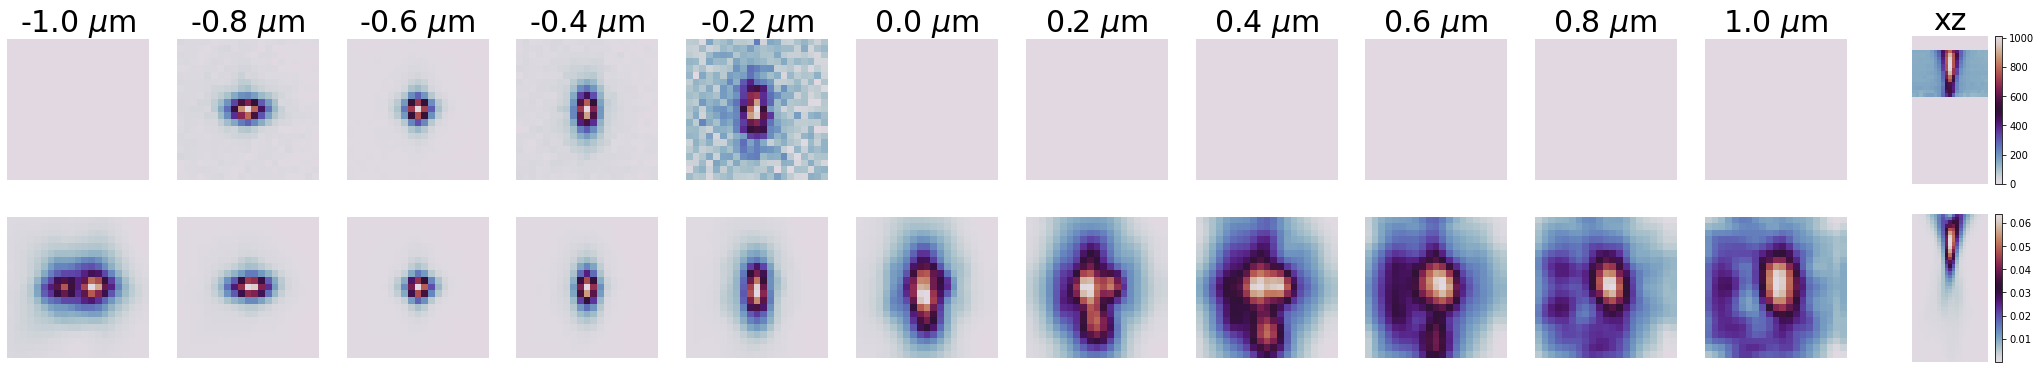

channel 1


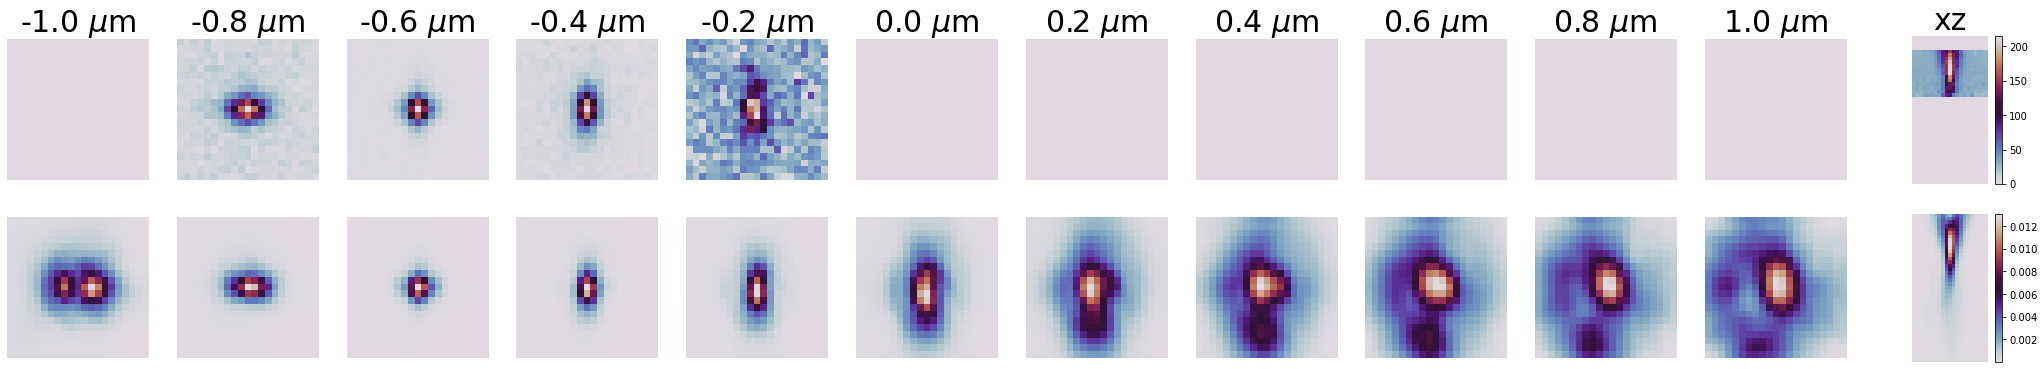

In [7]:
showpsfvsdata_insitu(f,p)

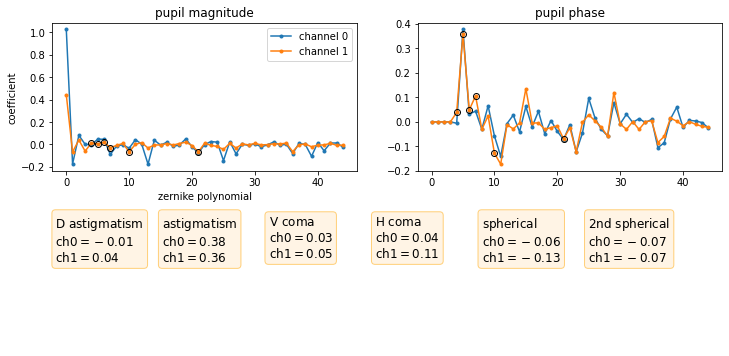

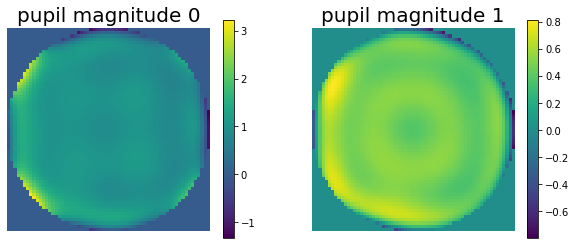

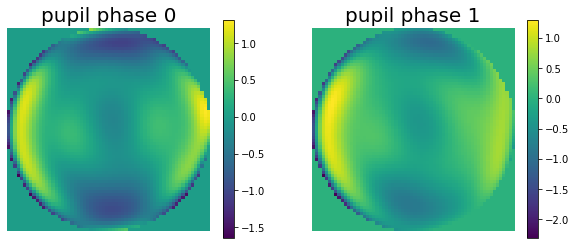

In [12]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

##### Optional plots

[[ 0.9988 -0.0504  0.    ]
 [ 0.0503  0.9977  0.    ]
 [-2.6582  4.0361  1.    ]]


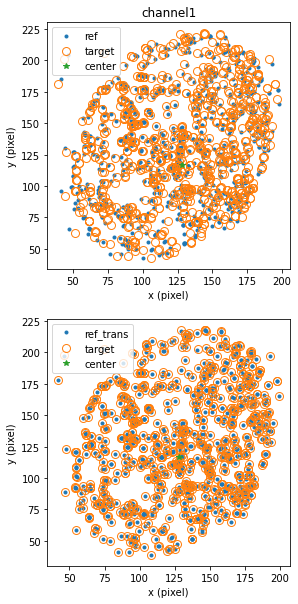

In [13]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

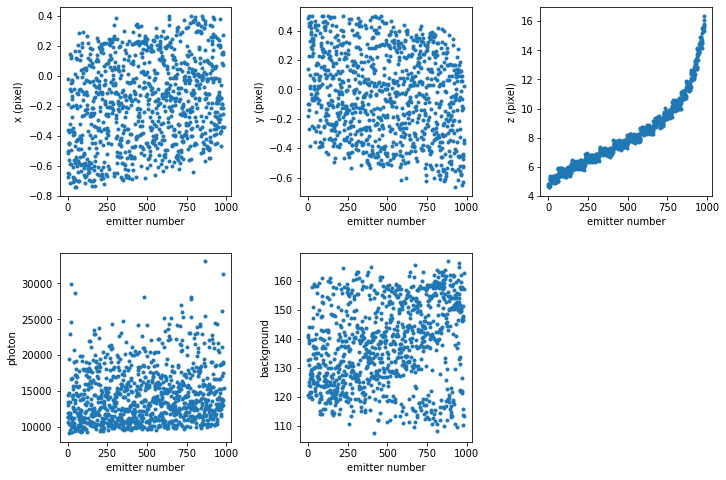

In [14]:
showlearnedparam_insitu(f,p)

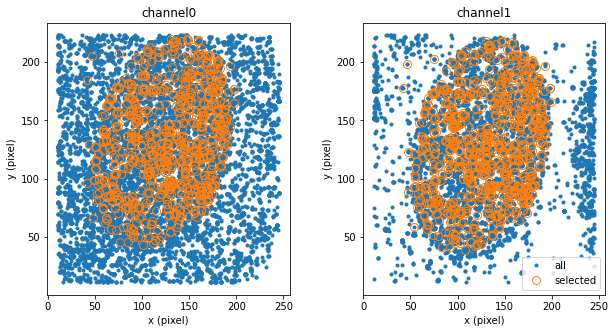

In [15]:
showcoord(f,p)

#### Ouput parameters

In [ ]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))